In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import warnings
warnings.filterwarnings("ignore")
from math import radians, cos, sin, asin, sqrt,atan2
from sklearn import linear_model
from datetime import timedelta
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from datetime import datetime
import seaborn as sns
from scipy.stats import norm
import googlemaps

In [110]:
df1=pd.read_csv('new_df.csv')

In [111]:
print(df1.head())
print(df1.shape)

   Unnamed: 0  trip_id bike_id  start_station  end_station  \
0           0  4767292    6127           3034         3055   
1           1  4767291    6026           3034         3055   
2           2  5108748    5873           3034         3055   
3           3  5350288    5776           3034         3055   
4           4  5350286    6691           3034         3055   

  trip_route_category           start_time             end_time  start_lat  \
0             One Way  2016-01-08 00:12:00  2016-01-08 00:49:00  34.042061   
1             One Way  2016-01-08 00:13:00  2016-01-08 00:49:00  34.042061   
2             One Way  2016-05-09 15:13:00  2016-05-09 15:21:00  34.042061   
3             One Way  2016-07-09 12:13:00  2016-07-09 12:33:00  34.042061   
4             One Way  2016-07-09 12:14:00  2016-07-09 12:34:00  34.042061   

   start_lon    end_lat    end_lon  plan_duration passholder_type  \
0 -118.26338  34.044159 -118.25158              0         Walk-up   
1 -118.26338  34.044

In [112]:
df1_roundtrip=df1.loc[df1["trip_route_category"]=='Round Trip']
df1_onewaytrip=df1.loc[df1["trip_route_category"]=='One Way']
print(df1_roundtrip.shape)
print(df1_onewaytrip.shape)

(86716, 16)
(490507, 16)


count     86716.000000
mean        513.751269
std        4533.347949
min           1.000000
25%          19.000000
50%          35.000000
75%          69.000000
max      132434.000000
Name: trip_duration_mins, dtype: float64
513.751268508695 4533.321810212411


Text(0.5,1,'Fit results: mu = 513.75,  std = 4533.32')

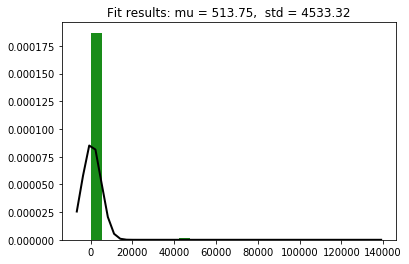

In [113]:
print(df1_roundtrip.trip_duration_mins.describe())

# Fit a normal distribution to the data:
mu, std = norm.fit(df1_roundtrip.trip_duration_mins)
print(mu,std)

# # Plot the histogram.
plt.hist(df1_roundtrip.trip_duration_mins, bins=25, density=True, alpha=0.9, color='g')

# # Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 50)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

count    490507.000000
mean        164.616925
std        2669.388745
min           1.000000
25%           6.000000
50%          10.000000
75%          18.000000
max      215836.000000
Name: trip_duration_mins, dtype: float64
164.61692493685106 2669.386023632656


Text(0.5,1,'Fit results: mu = 164.62,  std = 2669.39')

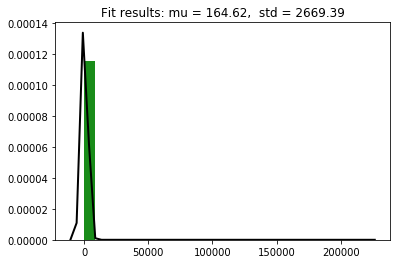

In [114]:
print(df1_onewaytrip.trip_duration_mins.describe())

# Fit a normal distribution to the data:
mu, std = norm.fit(df1_onewaytrip.trip_duration_mins)
print(mu,std)

# # Plot the histogram.
plt.hist(df1_onewaytrip.trip_duration_mins, bins=25, density=True, alpha=0.9, color='g')

# # Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 50)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

In [115]:
#to find standard deviation using median for round trip
df1_roundtrip['median']=np.median(df1_roundtrip.trip_duration_mins)
df1_roundtrip['std_num']=np.square(df1_roundtrip['trip_duration_mins']-df1_roundtrip['median'])
x1=np.sum(df1_roundtrip['std_num'])
y=(len(df1_roundtrip.trip_duration_mins)-1)
print(x1)
print(y)
std=np.sqrt(x1/y)
print(std)

1801976639375.0
86715
4558.557781804351


In [117]:
print(np.percentile(df1_onewaytrip.trip_duration_mins, 50))
print(np.percentile(df1_onewaytrip.trip_duration_mins, 90))

10.0
36.0


In [118]:
print(np.percentile(df1_roundtrip.trip_duration_mins,10))
print(np.percentile(df1_roundtrip.trip_duration_mins,90))

4.0
128.0


In [119]:
#to find standard deviation using median for onewaytrip
df1_onewaytrip['median']=np.median(df1_onewaytrip.trip_duration_mins)
df1_onewaytrip['std_num']=np.square(df1_onewaytrip['trip_duration_mins']-df1_onewaytrip['median'])
x1=np.sum(df1_onewaytrip['std_num'])
y=(len(df1_onewaytrip.trip_duration_mins)-1)
print(x1)
print(y)
std=np.sqrt(x1/y)
print(std)

3506893597720.0
490506
2673.8628821359316


In [120]:
print(type(df1_onewaytrip))

<class 'pandas.core.frame.DataFrame'>


In [123]:
df1_roundtrip=df1_roundtrip.loc[df1_roundtrip['trip_duration_mins']<=128]
print(df1_roundtrip.shape)
print(df1_roundtrip.head())
#8670 rows deleted after 90%percetile for roundtrip


(78046, 18)
     Unnamed: 0  trip_id bike_id  start_station  end_station  \
153         153  4767285    6137           3028         3028   
154         154  4767284    5927           3028         3028   
155         155  4767283    5862           3028         3028   
158         158  4767156    6137           3028         3028   
159         159  4799021    6327           3028         3028   

    trip_route_category           start_time             end_time  start_lat  \
153          Round Trip  2016-01-08 00:42:00  2016-01-08 01:18:00  34.058319   
154          Round Trip  2016-01-08 00:44:00  2016-01-08 01:17:00  34.058319   
155          Round Trip  2016-01-08 00:46:00  2016-01-08 01:17:00  34.058319   
158          Round Trip  2016-01-08 09:48:00  2016-01-08 10:06:00  34.058319   
159          Round Trip  2016-02-08 15:40:00  2016-02-08 15:45:00  34.058319   

     start_lon    end_lat    end_lon  plan_duration passholder_type  \
153 -118.24609  34.058319 -118.24609              0

In [124]:
df1_onewaytrip=df1_onewaytrip.loc[df1_onewaytrip['trip_duration_mins']<=36]
print(df1_onewaytrip.shape)
print(df1_onewaytrip.head())
#47413 rows deleted after 90%percetile for onewaytrip

(443094, 18)
   Unnamed: 0  trip_id bike_id  start_station  end_station  \
1           1  4767291    6026           3034         3055   
2           2  5108748    5873           3034         3055   
3           3  5350288    5776           3034         3055   
4           4  5350286    6691           3034         3055   
5           5  5350285    6011           3034         3055   

  trip_route_category           start_time             end_time  start_lat  \
1             One Way  2016-01-08 00:13:00  2016-01-08 00:49:00  34.042061   
2             One Way  2016-05-09 15:13:00  2016-05-09 15:21:00  34.042061   
3             One Way  2016-07-09 12:13:00  2016-07-09 12:33:00  34.042061   
4             One Way  2016-07-09 12:14:00  2016-07-09 12:34:00  34.042061   
5             One Way  2016-07-09 12:14:00  2016-07-09 12:34:00  34.042061   

   start_lon    end_lat    end_lon  plan_duration passholder_type  \
1 -118.26338  34.044159 -118.25158              0         Walk-up   
2 -118.

In [131]:
df_final=pd.concat([df1_onewaytrip,df1_roundtrip],axis=0)
print(df_final.shape)
df_final.to_csv('df_final.csv',index=0)

(521140, 18)
